<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Access ACTRIS In-Situ NRT data

The goal of this notebook is to achieve a comprehensive understanding of accessing and analyzing ACTRIS In-Situ NRT data. By following the step-by-step instructions and code examples, users will learn how to explore and stream or download data, inspect and process the data, and visualize the results. 

### Import libraries

In [1]:
# Library for working with netCDF files
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Libraries for working directly with a threddsserver, making HTTP requests, and handling file system operations
import threddsclient
import requests
import os

### THREDDS Data Catalog

ACTRIS In-Situ NRT data can accessed either by using the EBAS data portal (https://ebas-data.nilu.no/, Framework: "ACTRIS_NRT") or by a THREDDS Data Server (TDS), which provides catalog, metadata, and data access services for scientific data. The catalog is found here: https://thredds.nilu.no/thredds/catalog/actris_nrt/catalog.html. 

This example includes two methods of accessing the data: 
- THREDDS Data Catalog - Opendap protocol (Streaming of data)
- THREDDS Data Catalog - HTTPS protocol (Download of data)

You only need to run one of the protocols to get the dataset in question for the analysis. 

In [2]:
protocol = 'opendap' # choose 'http' or 'opendap'

To search the files you either have to look at certain key words in the file names, or open the files to look at the metadata of the dataset itself. For this example we will use the filenames to search for data. 

When searching in THREDDS the filenames use the the EBAS site code for different stations.  
The site code for different stations can be found at https://ebas-submit.nilu.no/templates/comments/st_station

In [3]:
if protocol == 'opendap': 
    all_opendap_urls = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/actris_nrt/catalog.xml') # Get the ACTRIS NRT thredds catalog, opendap protocol     
    acsm_opendap_urls = [x for x in all_opendap_urls if 'aerosol_mass_spectrometer' in x] # Get all ACSM datasets    
    acsm_birkenes_opendap_urls = [x for x in acsm_opendap_urls if 'NO0002R' in x] # Get ACSM datasets at Birkenes II (site code: NO0002R). 

    print('All In-Situ NRT ACSM datasets with opendap protocol: \n',acsm_opendap_urls)
    print('In-Situ NRT ACSM dataset at Birkenes II: \n',acsm_birkenes_opendap_urls )

elif protocol == 'http': 
    all_download_urls = threddsclient.download_urls('https://thredds.nilu.no/thredds/catalog/actris_nrt/catalog.xml') # Get the ACTRIS NRT thredds catalog, http protocol
    acsm_download_urls = [x for x in all_download_urls if 'aerosol_mass_spectrometer' in x] # Get all ACSM datasets
    acsm_birkenes_download_urls = [x for x in acsm_download_urls if 'NO0002R' in x] # Get ACSM datasets at Birkenes II (site code: NO0002R).

    print('All In-Situ NRT ACSM datasets with opendap protocol: \n',acsm_download_urls)
    print('In-Situ NRT ACSM dataset at Birkenes II: \n',acsm_birkenes_download_urls)
    
    # As this protocol downloads the file, we create a folder for the data
    # Create the "data_oc_ec" folder if it doesn't exist
    if not os.path.exists("static/data_acsm"):
        os.makedirs("static/data_acsm")

    r = requests.get(acsm_birkenes_download_urls[0])
    filename = r.url[54:]
    print(filename)
    filepath = os.path.join("static/data_acsm", filename)  # Specify the folder path
    with open(filepath, mode="wb") as file:
        file.write(r.content)
else: 
    print('Please choose a valid protocol: http or opendap')

All In-Situ NRT ACSM datasets with opendap protocol: 
 ['https://thredds.nilu.no/thredds/dodsC/actris_nrt/RO0010R.20240717050000.20241017053406.aerosol_mass_spectrometer...3mo.1h.RO03L_Aerodyne_Q-ACSM_140-172_NRT.RO03L_Aerodyne_Q-ACSM_.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/NO0002R.20240717050000.20241017053604.aerosol_mass_spectrometer...3mo.1h.NO01L_Aerodyne_Q-ACSM_140-144_NRT.NO01L_Aerodyne_Q-ACSM_BIR.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/IE0011U.20240717050000.20241017043604.aerosol_mass_spectrometer...3mo.1h.IE04L_Aerodyne_Q-ACSM_140-133_ACSMdry_NRT.IE04L_Aerodyne_Q-ACSM_.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0030R.20240716010000.20241009084004.aerosol_mass_spectrometer...3mo.1h.FR04L_Aerodyne_Q-ACSM_140-142_NRT.FR01L_Ng_2011.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20240717050000.20241017043602.aerosol_mass_spectrometer...3mo.1h.FR01L_Aerodyne_Q-ACSM_140-113_NRT.FR01L_Aerodyne_Q-

### Inspect data

Opening the one dataset and inspecting it. The datasets are opened in netCDF format and in this example opened in xarray. 

Documentation on in-situ file formats can be found here: https://ebas.pages.nilu.no/ebas-io/fileformat_netcdf/index.html 

In [4]:
if protocol == 'opendap':
    ds = xr.open_dataset(acsm_birkenes_opendap_urls[0])
elif protocol == 'http':
    ds = xr.open_dataset(filepath)
else:
    print('Please choose a valid protocol: http or opendap')

ds

<xarray.Dataset>
Dimensions:                                                (time: 1465,
                                                            tbnds: 2,
                                                            metadata_time: 77,
                                                            Location: 1,
                                                            pressure_qc_flags: 1,
                                                            ammonium_ug_N_per_m3_amean_qc_flags: 1,
                                                            ...
                                                            organic_mass_amean_Fraction_qc_flags: 1,
                                                            organic_mass_uncertainty_Fraction_qc_flags: 1,
                                                            sulphate_total_ug_S_per_m3_amean_qc_flags: 1,
                                                            sulphate_total_ug_per_m3_amean_qc_flags: 1,
                                                            sulphate_total_ug_S_per_m3_uncertainty_qc_flags: 1,
                                                            sulphate_total_ug_per_m3_uncertainty_qc_flags: 1)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * metadata_time                                          (metadata_time) datetime64[ns] ...
  * Location                                               (Location) |S64 b'...
  * Fraction                                               (Fraction) |S64 b'...
  * Fractionx                                              (Fractionx) |S64 b...
Dimensions without coordinates: tbnds, pressure_qc_flags,
                                ammonium_ug_N_per_m3_amean_qc_flags,
                                ammonium_ug_per_m3_amean_qc_flags,
                                ammonium_ug_N_per_m3_uncertainty_qc_flags,
                                ammonium_ug_per_m3_uncertainty_qc_flags,
                                chloride_amean_qc_flags,
                                ...
                                organic_mass_amean_Fraction_qc_flags,
                                organic_mass_uncertainty_Fraction_qc_flags,
                                sulphate_total_ug_S_per_m3_amean_qc_flags,
                                sulphate_total_ug_per_m3_amean_qc_flags,
                                sulphate_total_ug_S_per_m3_uncertainty_qc_flags,
                                sulphate_total_ug_per_m3_uncertainty_qc_flags
Data variables: (12/71)
    time_bnds                                              (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                     (metadata_time, tbnds) datetime64[ns] ...
    pressure_qc                                            (Location, pressure_qc_flags, time) float64 ...
    pressure_ebasmetadata                                  (Location, metadata_time) |S64 ...
    ammonium_ug_N_per_m3_amean                             (time) float64 ...
    ammonium_ug_N_per_m3_amean_qc                          (ammonium_ug_N_per_m3_amean_qc_flags, time) float64 ...
    ...                                                     ...
    nitrate_ug_N_per_m3_amean_Fraction                     (Fraction, time) float64 ...
    nitrate_ug_per_m3_amean_Fraction                       (Fraction, time) float64 ...
    nitrate_ug_N_per_m3_uncertainty_Fraction               (Fraction, time) float64 ...
    nitrate_ug_per_m3_uncertainty_Fraction                 (Fraction, time) float64 ...
    organic_mass_amean_Fraction                            (Fractionx, time) float64 ...
    organic_mass_uncertainty_Fraction                      (Fractionx, time) float64 ...
Attributes: (12/108)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Inorganics in air and particle phase a...
    keywords:                          sulphate_total, mass_concent

### Processing the data

As the variable name might change slightly between datasets, we can use the attributes to identify the variable we are interested in, see https://ebas.pages.nilu.no/ebas-io/fileformat_netcdf/variables.html for more information.

In [5]:
variables2plot = []

# Iterate over each variable in the dataset
for v in list(ds.data_vars.keys()):
    attrs = ds[v].attrs
    # Check if the variable has 'ebas_statistics' as 'arithmetic mean' and 'units' as 'ug/m3'
    if attrs.get('ebas_statistics') == 'arithmetic mean' and attrs.get('units') == 'ug/m3':
        # Check if the variable does not have dimensions 'Fraction', 'Fractionx', 'Fractionxx'
        if all(dim not in ds[v].dims for dim in ['Fraction', 'Fractionx', 'Fractionxx']):
            variables2plot.append(v)  # Add the variable to the list of variables to plot

variables2plot

['ammonium_ug_per_m3_amean',
 'chloride_amean',
 'nitrate_ug_per_m3_amean',
 'organic_mass_amean',
 'sulphate_total_ug_per_m3_amean']

### Data visualisation

As a last step you can compare you plot to plots of NRT data available at https://ebas-nrt.nilu.no/.  

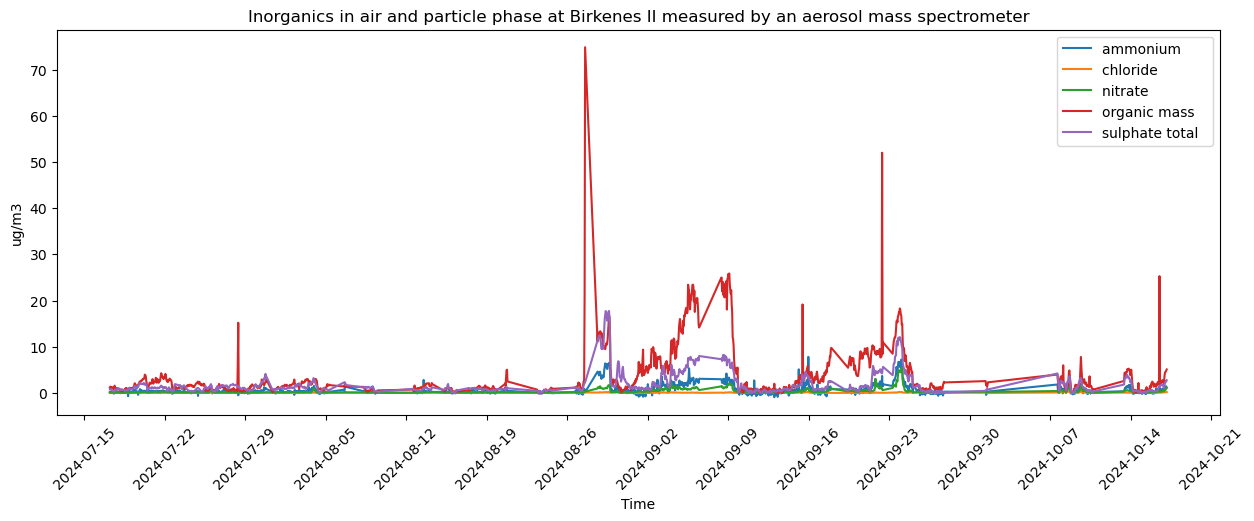

In [7]:
# Define the function to plot variables
def plot_variables(variables, dataset):
    # Set up the figure and axes
    plt.figure(figsize=(15,5))
    plt.xlabel('Time')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    plt.xticks(rotation=45)
    
    # Iterate over each variable and plot it
    for v in variables:
        units = dataset[v].attrs['units']  # Get the units of the variable
        y = dataset.variables[v].data  # Get the data for the variable
        x = dataset.variables['time'].data  # Get the time data
        plt.plot(x, y, label=v.replace('amean','').replace('ug_per_m3','').replace('_', ' '))  # Plot the variable data
    
    # Set the y-axis label, legend, and title
    plt.ylabel(units)
    plt.legend()
    plt.title('{} measured by an {}'.format(dataset.attrs['title'], dataset.attrs['ebas_instrument_type'].replace('_', ' ')))    
    
    # Show the plot
    plt.show()

# Call the function to plot the variables
plot_variables(variables2plot, ds)